In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 加载数据

In [2]:
df = pd.read_excel(r'D:\paper\safety\data\max_accident_data\accident_type.xlsx')
df.head()

,时间,省市,列1,事故,死亡/人,受伤/人,Unnamed: 6
0,2005-01-05,山西,运城市平陆县境内平风线,翻车,12.0,12.0,NaN
1,2005-01-06,福建,莆田市同三线高速公路莆田灵川路段,车辆失控,28.0,19.0,NaN
2,2005-01-11,山西,临汾市襄汾县京安村襄浏花炮厂装配车间,爆炸,25.0,10.0,NaN
3,2005-01-12,河南,洛阳市宜阳县城关乡乔岩直井煤矿,瓦斯燃烧,10.0,17.0,NaN
4,2005-01-16,重庆,南川区南城街道办事处云华煤业有限公司,煤与瓦斯突出,12.0,NaN,NaN


### 事故数据量

In [3]:
len(df)

853

In [4]:
data = df.drop('Unnamed: 6',axis =1)
data.head()

,时间,省市,列1,事故,死亡/人,受伤/人
0,2005-01-05,山西,运城市平陆县境内平风线,翻车,12.0,12.0
1,2005-01-06,福建,莆田市同三线高速公路莆田灵川路段,车辆失控,28.0,19.0
2,2005-01-11,山西,临汾市襄汾县京安村襄浏花炮厂装配车间,爆炸,25.0,10.0
3,2005-01-12,河南,洛阳市宜阳县城关乡乔岩直井煤矿,瓦斯燃烧,10.0,17.0
4,2005-01-16,重庆,南川区南城街道办事处云华煤业有限公司,煤与瓦斯突出,12.0,NaN


### 标题列重命名

In [5]:
data.columns = ['time','province','city','accident','death','injury']
data.head()

,time,province,city,accident,death,injury
0,2005-01-05,山西,运城市平陆县境内平风线,翻车,12.0,12.0
1,2005-01-06,福建,莆田市同三线高速公路莆田灵川路段,车辆失控,28.0,19.0
2,2005-01-11,山西,临汾市襄汾县京安村襄浏花炮厂装配车间,爆炸,25.0,10.0
3,2005-01-12,河南,洛阳市宜阳县城关乡乔岩直井煤矿,瓦斯燃烧,10.0,17.0
4,2005-01-16,重庆,南川区南城街道办事处云华煤业有限公司,煤与瓦斯突出,12.0,NaN


In [6]:
data.death.max()
#死亡人数最多的时候是271人

271.0

In [7]:
data.death.min()
#最少的是死亡1人，早期统计的时候是将死伤人数不确定这部分算作死亡进行累计
#至2010年后就没有这么统计了，直到2015年5-6份起就没有统计受伤人数，只统计死亡人数超过10人（包含10）

1.0

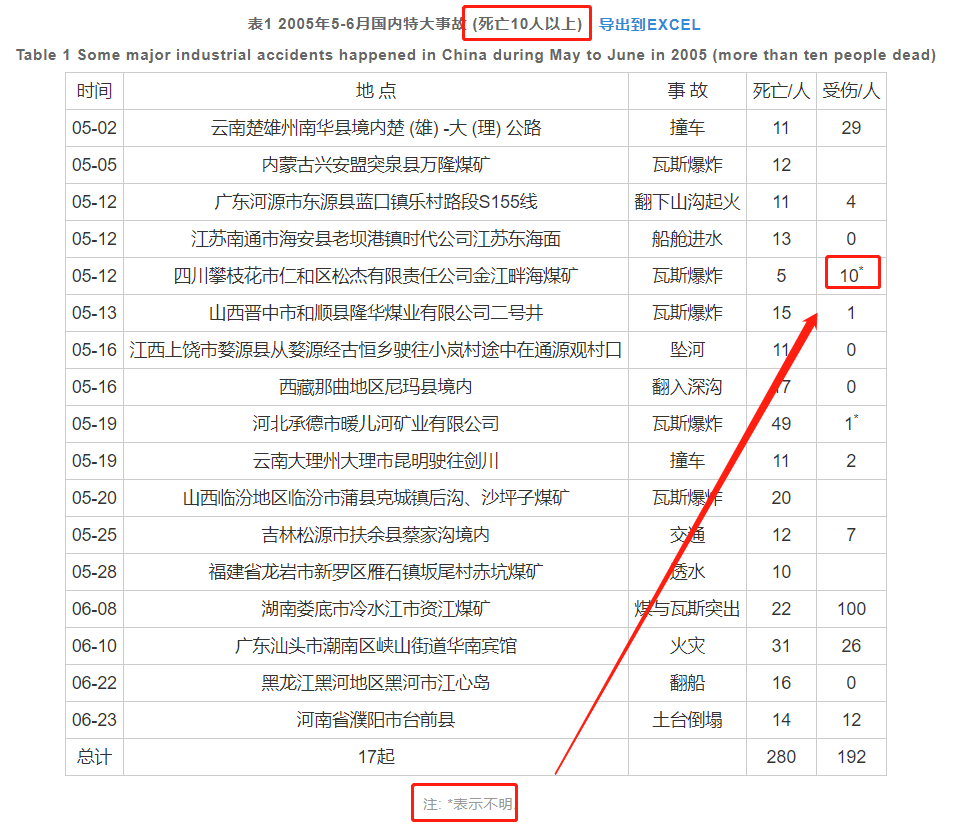

In [8]:
from IPython.display import Image
Image(r'C:\Users\86177\Desktop\2005-2019年安全事故统计论文\2005_5_6.png', width=500, height=200)

In [9]:
data[data.death < 10]

,time,province,city,accident,death,injury
43,2005-05-12,四川,攀枝花市仁和区松杰有限责任公司金江畔海煤矿,瓦斯爆炸,5.0,10.0
57,2005-07-07,江西,萍乡市上栗区赤山镇永胜煤矿,透水,5.0,10.0
63,2005-07-18,辽宁,东港市附近海域,船舶倾覆,1.0,12.0
92,2005-10-11,黑龙江,哈尔滨市道外区南三道街 109 号“ 回”字型居民住宅楼,火灾,6.0,7.0
141,2006-02-25,湖南,邵阳市隆回县大园煤矿,煤与瓦斯突出,6.0,14.0
233,2007-03-17,浙江,舟山市货船,沉船,8.0,9.0
237,2007-03-27,贵州,六盘水市水城矿业(集团)公司汪家寨煤矿,煤与瓦斯突出,1.0,10.0
239,2007-04-08,浙江,台州市海域,撞船,2.0,18.0
246,2007-04-22,山西,河津市下化乡半坡小学建筑工地,塌陷,9.0,4.0
267,2007-08-05,湖北,巴东县中铁16 局宜万铁路野山关隧道,透水,3.0,26.0


### 事故分类

In [10]:
data['type'] = pd.cut(data.death,[0,30,272],labels = ['重大事故','特别重大事故'])
data.type.value_counts()

重大事故      746
特别重大事故     72
Name: type, dtype: int64

In [11]:
data[data['type'] == '特别重大事故']

,time,province,city,accident,death,injury,type
8,2005-02-14,辽宁,阜新市矿业 (集团 )公司海州立井,瓦斯爆炸,214.0,NaN,特别重大事故
22,2005-03-17,江西,上饶市境内沪瑞高速公路梨温段,追尾爆炸,31.0,NaN,特别重大事故
24,2005-03-19,山西,朔州市平鲁区白堂镇细水煤矿,瓦斯爆炸,72.0,NaN,特别重大事故
47,2005-05-19,河北,承德市暧儿河矿业有限公司,瓦斯爆炸,49.0,1.0,特别重大事故
53,2005-06-10,广东,汕头市潮南区峡山街道华南宾馆,火灾,31.0,26.0,特别重大事故
...,...,...,...,...,...,...,...
787,2016-12-04,内蒙古,赤峰市宝马矿业,瓦斯爆炸事故,32.0,NaN,特别重大事故
806,2017-08-10,陕西,安康市,道路运输事故,36.0,NaN,特别重大事故
822,2018-06-26,湖南,郴州市宜章县,道路交通事故,35.0,NaN,特别重大事故
835,2019-03-21,江苏,盐城市响水陈家港化工园区,发生爆炸事故,78.0,NaN,特别重大事故


In [12]:
data[data['type'] == '特别重大事故'].death.sum()

4131.0

In [13]:
data[data['type'] == '重大事故'].death.sum()

10711.0

In [14]:
print('平均每年{:.1f}起重大事故，死亡{:.1f}人'.format(746/15,10711/15))
print('平均每年{:.1f}起特别重大事故，死亡{:.1f}人'.format(72/15,4131/15))

平均每年49.7起重大事故，死亡714.1人
平均每年4.8起特别重大事故，死亡275.4人


### 事故统计

In [15]:
data['num'] = 1
data_max_acci = data.set_index('time').resample('Y')['num','death'].sum()
data_max_acci.index = data_max_acci.index.year.tolist()
data_max_acci

,num,death
2005,125,2542.0
2006,94,1554.0
2007,88,1372.0
2008,94,1694.0
2009,72,1174.0
2010,81,1445.0
2011,74,1062.0
2012,49,726.0
2013,36,673.0
2014,23,426.0


### 每年事故占比

In [16]:
data_max_acci['account'] = (data_max_acci['num'] / data_max_acci['num'].sum()).map(lambda x:f'{round(x*100,2)}%')
data_max_acci

,num,death,account
2005,125,2542.0,14.65%
2006,94,1554.0,11.02%
2007,88,1372.0,10.32%
2008,94,1694.0,11.02%
2009,72,1174.0,8.44%
2010,81,1445.0,9.5%
2011,74,1062.0,8.68%
2012,49,726.0,5.74%
2013,36,673.0,4.22%
2014,23,426.0,2.7%


### 绘制特大事故图

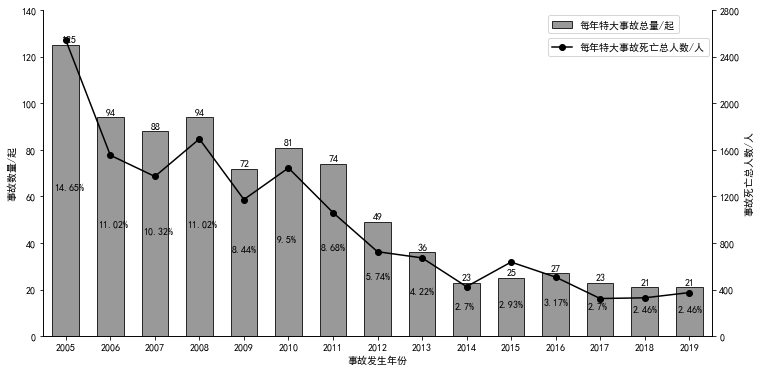

In [69]:

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

figure,ax = plt.subplots(figsize=(12,6))
ax.set_xticks(range(2005,2020))
ax.set_ylim(0,140)
ax.set_yticks(range(0,160,20))
ax.bar(data_max_acci.index, data_max_acci.num.values, width=0.6,edgecolor='k',color='gray',alpha = 0.8,label = '每年特大事故总量/起')
ax.legend(loc=(0.754,0.93))
ax.set_xlabel('事故发生年份')
ax.set_ylabel('事故数量/起')
ax.spines['top'].set_visible(False)
for i,j,k in zip(data_max_acci.index,data_max_acci.num.values,data_max_acci.account.values):
    ax.text(i-0.27,j/2-0.1,k,fontsize = 10)
    ax.text(i-0.1,j+1,"%.0f" %j,fontsize = 10)

ax1 = ax.twinx()
ax1.spines['top'].set_visible(False)
ax1.set_ylim(0,2600)
ax1.set_yticks(range(0,3000,400))
ax1.plot(data_max_acci.index,data_max_acci.death.values,label = '每年特大事故死亡总人数/人',color = 'k',marker ='o')
ax1.legend(loc=(0.754,0.86))
ax1.set_ylabel('事故死亡总人数/人')
plt.savefig(r'C:\Users\86177\Desktop\2005-2019年安全事故统计论文\img\1.png',dpi = 200)

In [18]:
#近五年的特大事故的平均数量为：
data_max_acci.num.values[-6:].mean()
#可大约为24起

23.333333333333332

### 查看异常值的数据

In [19]:
data[data['time'].dt.year.isin([2015])]
#果然发现里面存在着一个异常值就是天津港瑞海公司危险品仓库爆炸，死亡165人

,time,province,city,accident,death,injury,type,num
736,2015-04-04,贵州,毕节市纳雍县,中巴坠河,14.0,NaN,重大事故,1
737,2015-04-19,山西,大同市南郊区姜 家 湾 煤 矿,发生透水,21.0,NaN,重大事故,1
738,2015-04-28,浙江,台州市三门县,渔船沉船,15.0,NaN,重大事故,1
739,2015-05-02,天津,滨海新区,道路交通事故,10.0,NaN,重大事故,1
740,2015-05-09,山东,临沂市兰陵县,运输公司发生坍塌,10.0,NaN,重大事故,1
741,2015-05-15,陕西,咸阳市淳化县,道路交通事故,35.0,NaN,特别重大事故,1
742,2015-05-25,河南,平顶山市鲁山县,老年公寓起火,38.0,NaN,特别重大事故,1
743,2015-06-10,西藏,贡嘎县,道路交通事故,11.0,NaN,重大事故,1
744,2015-06-26,安徽,芜湖市,道路交通事故,12.0,NaN,重大事故,1
745,2015-07-01,吉林,集安市,道路交通事故,11.0,NaN,重大事故,1


### 按季度统计数据

In [20]:
#编写获取事故发生的年月日的函数

def get_year_month_day(df,time_col):
    
    '''Extract the year, month, and day of the time field data'''
    
    df['year'] = df[time_col].dt.year
    df['month'] = df[time_col].dt.month
    df['day'] = df[time_col].dt.day
    return df

In [21]:
data_time = get_year_month_day(data,'time')
data_time

,time,province,city,accident,death,injury,type,num,year,month,day
0,2005-01-05,山西,运城市平陆县境内平风线,翻车,12.0,12.0,重大事故,1,2005,1,5
1,2005-01-06,福建,莆田市同三线高速公路莆田灵川路段,车辆失控,28.0,19.0,重大事故,1,2005,1,6
2,2005-01-11,山西,临汾市襄汾县京安村襄浏花炮厂装配车间,爆炸,25.0,10.0,重大事故,1,2005,1,11
3,2005-01-12,河南,洛阳市宜阳县城关乡乔岩直井煤矿,瓦斯燃烧,10.0,17.0,重大事故,1,2005,1,12
4,2005-01-16,重庆,南川区南城街道办事处云华煤业有限公司,煤与瓦斯突出,12.0,NaN,重大事故,1,2005,1,16
...,...,...,...,...,...,...,...,...,...,...,...
848,2019-11-18,山西,晋中市平遥县,峰岩集团二亩沟矿瓦斯爆炸,15.0,NaN,重大事故,1,2019,11,18
849,2019-11-26,云南,临沧市凤庆县,安石隧道掌子面突泥涌水,12.0,NaN,重大事故,1,2019,11,26
850,2019-12-03,浙江,海宁市许村镇工业园,龙洲印染有限责任公司污水厌氧罐倒塌,10.0,NaN,重大事故,1,2019,12,3
851,2019-12-04,湖南,浏阳市,澄潭江镇碧溪烟花制造有限公司违法生产致爆炸,13.0,NaN,重大事故,1,2019,12,4


In [22]:
data_time['season'] = pd.cut(data_time['month'],bins=[0,3,6,9,12],labels=['第一季度','第二季度','第三季度','第四季度'])
data_time['up_down_year'] = pd.cut(data_time['month'],bins=[0,6,12],labels=['上半年','下半年'])
data_time

,time,province,city,accident,death,injury,type,num,year,month,day,season,up_down_year
0,2005-01-05,山西,运城市平陆县境内平风线,翻车,12.0,12.0,重大事故,1,2005,1,5,第一季度,上半年
1,2005-01-06,福建,莆田市同三线高速公路莆田灵川路段,车辆失控,28.0,19.0,重大事故,1,2005,1,6,第一季度,上半年
2,2005-01-11,山西,临汾市襄汾县京安村襄浏花炮厂装配车间,爆炸,25.0,10.0,重大事故,1,2005,1,11,第一季度,上半年
3,2005-01-12,河南,洛阳市宜阳县城关乡乔岩直井煤矿,瓦斯燃烧,10.0,17.0,重大事故,1,2005,1,12,第一季度,上半年
4,2005-01-16,重庆,南川区南城街道办事处云华煤业有限公司,煤与瓦斯突出,12.0,NaN,重大事故,1,2005,1,16,第一季度,上半年
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,2019-11-18,山西,晋中市平遥县,峰岩集团二亩沟矿瓦斯爆炸,15.0,NaN,重大事故,1,2019,11,18,第四季度,下半年
849,2019-11-26,云南,临沧市凤庆县,安石隧道掌子面突泥涌水,12.0,NaN,重大事故,1,2019,11,26,第四季度,下半年
850,2019-12-03,浙江,海宁市许村镇工业园,龙洲印染有限责任公司污水厌氧罐倒塌,10.0,NaN,重大事故,1,2019,12,3,第四季度,下半年
851,2019-12-04,湖南,浏阳市,澄潭江镇碧溪烟花制造有限公司违法生产致爆炸,13.0,NaN,重大事故,1,2019,12,4,第四季度,下半年


In [23]:
data_season = data_time.groupby(['up_down_year','season']).agg({"num":"count","death":"sum"})
data_season.dropna(inplace = True)
data_season
#每次的事故计数都是1，而死亡人数不确定，因此除了知道具体的事故和死亡人数，还可以了解一下死亡人数的分布情况

num   death
up_down_year season             
上半年          第一季度    202  3245.0
             第二季度    220  3566.0
下半年          第三季度    206  3908.0
             第四季度    225  4123.0

In [24]:
data_season.death.sum()

14842.0

In [25]:
data_time.death.sum()
#核实数据

14842.0

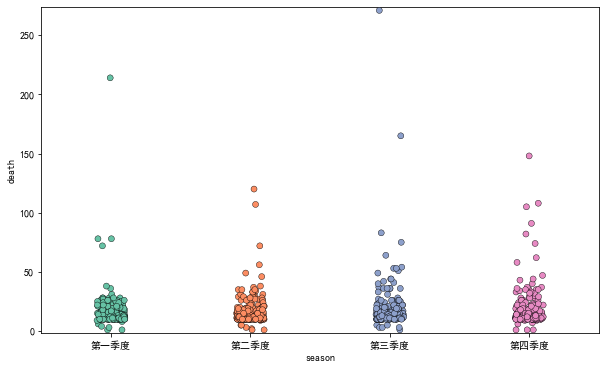

In [38]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.stripplot(x="season", y="death",
              data=data_time, jitter=1,
              palette="Set2",  # 设置调色盘
              dodge=True,  # 是否拆分
              edgecolor='black',
             size = 6,
              linewidth=0.4,
             )

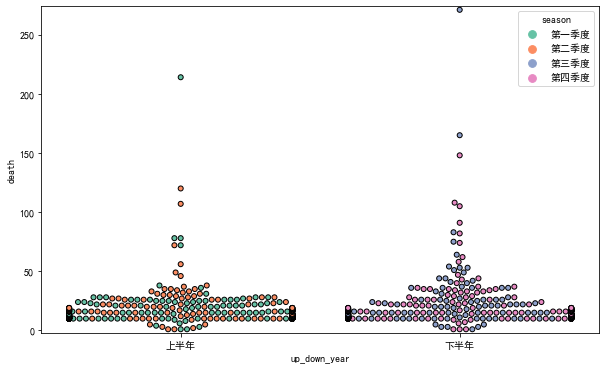

In [39]:
plt.figure(figsize=(10,6))
sns.swarmplot(x="up_down_year", y="death", hue="season", data=data_time,
              size = 5, edgecolor = 'K',linewidth=1,marker = 'o',
              palette = 'Set2')

In [35]:
data_time_copy = data_time.copy()
#修改列名尽量重新创建一个副本

In [36]:
data_time_copy = data_time_copy.rename(columns={"season":"事故发生季度","death":"死亡人数/人"})
data_time_copy

,time,province,city,accident,死亡人数/人,injury,type,num,year,month,day,事故发生季度,up_down_year
0,2005-01-05,山西,运城市平陆县境内平风线,翻车,12.0,12.0,重大事故,1,2005,1,5,第一季度,上半年
1,2005-01-06,福建,莆田市同三线高速公路莆田灵川路段,车辆失控,28.0,19.0,重大事故,1,2005,1,6,第一季度,上半年
2,2005-01-11,山西,临汾市襄汾县京安村襄浏花炮厂装配车间,爆炸,25.0,10.0,重大事故,1,2005,1,11,第一季度,上半年
3,2005-01-12,河南,洛阳市宜阳县城关乡乔岩直井煤矿,瓦斯燃烧,10.0,17.0,重大事故,1,2005,1,12,第一季度,上半年
4,2005-01-16,重庆,南川区南城街道办事处云华煤业有限公司,煤与瓦斯突出,12.0,NaN,重大事故,1,2005,1,16,第一季度,上半年
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,2019-11-18,山西,晋中市平遥县,峰岩集团二亩沟矿瓦斯爆炸,15.0,NaN,重大事故,1,2019,11,18,第四季度,下半年
849,2019-11-26,云南,临沧市凤庆县,安石隧道掌子面突泥涌水,12.0,NaN,重大事故,1,2019,11,26,第四季度,下半年
850,2019-12-03,浙江,海宁市许村镇工业园,龙洲印染有限责任公司污水厌氧罐倒塌,10.0,NaN,重大事故,1,2019,12,3,第四季度,下半年
851,2019-12-04,湖南,浏阳市,澄潭江镇碧溪烟花制造有限公司违法生产致爆炸,13.0,NaN,重大事故,1,2019,12,4,第四季度,下半年


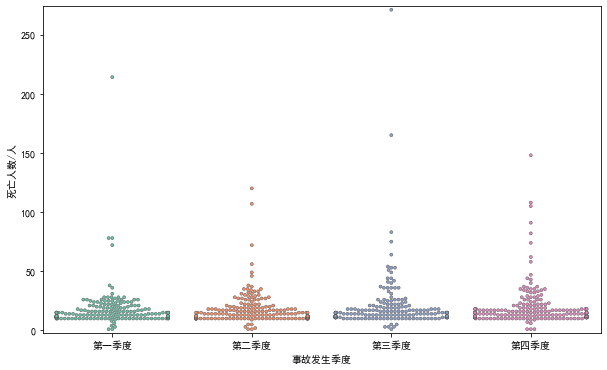

In [41]:
plt.figure(figsize=(10,6))
sns.swarmplot(x="事故发生季度", y="死亡人数/人", data=data_time_copy,palette="Set2",size = 3,alpha = 1,linewidth = 0.5)

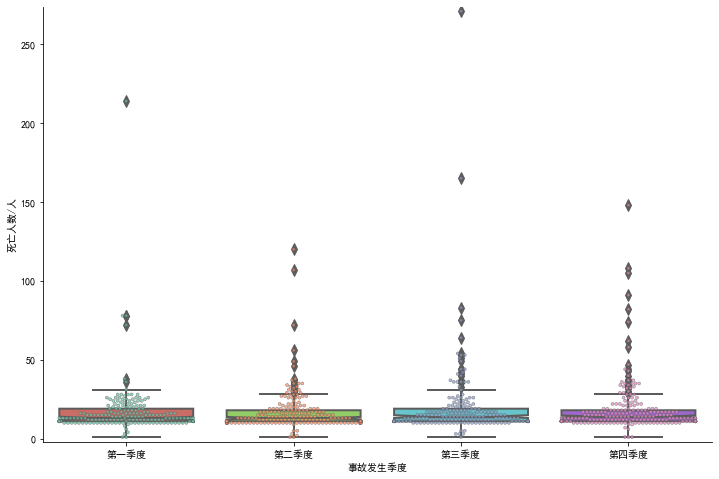

In [50]:
figure,ax = plt.subplots(figsize=(12,8))

sns.boxplot(x="事故发生季度", y="死亡人数/人", data=data_time_copy,
            linewidth = 2,   # 线宽
            width = 0.8,     # 箱之间的间隔比例
            fliersize = 8,   # 异常点大小
            palette = 'hls', # 设置调色板
            whis = 1.5,      # 设置IQR 
            notch = True,    # 设置是否以中值做凹槽

           )
# 绘制箱型图

sns.swarmplot(x="事故发生季度", y="死亡人数/人", data=data_time_copy,palette="Set2",size = 3,alpha = 0.7,linewidth = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(r'C:\Users\86177\Desktop\2005-2019年安全事故统计论文\img\2.png',dpi = 200)

In [51]:
data_time[data_time.death>100]

,time,province,city,accident,death,injury,type,num,year,month,day,season,up_down_year
8,2005-02-14,辽宁,阜新市矿业 (集团 )公司海州立井,瓦斯爆炸,214.0,NaN,特别重大事故,1,2005,2,14,第一季度,上半年
113,2005-11-27,黑龙江,七台河市龙煤集团七台河分公司东风煤矿皮带井,爆炸,148.0,3.0,特别重大事故,1,2005,11,27,第四季度,下半年
301,2007-12-05,山西,临汾市洪洞县瑞之源煤业有限公司(洪洞县左木乡红光村原新窑煤矿),瓦斯爆炸,105.0,NaN,特别重大事故,1,2007,12,5,第四季度,下半年
372,2008-09-08,山西,临汾市襄汾县新塔矿业有限公司,尾矿库溃坝,271.0,NaN,特别重大事故,1,2008,9,8,第三季度,下半年
465,2009-11-21,黑龙江,哈尔滨市龙煤集团鹆岗分公川新兴煤矿,煤与瓦斯突出及爆炸,108.0,NaN,特别重大事故,1,2009,11,21,第四季度,下半年
512,2010-06-28,贵州,关岭布依族苗族自治县岗乌镇大寨村,山体滑坡,107.0,NaN,特别重大事故,1,2010,6,28,第二季度,上半年
693,2013-06-03,吉林,德惠市吉林宝源丰禽业有限公司,火灾,120.0,77.0,特别重大事故,1,2013,6,3,第二季度,上半年
749,2015-08-12,天津,滨海新区瑞海公司危险品仓库,爆炸,165.0,NaN,特别重大事故,1,2015,8,12,第三季度,下半年


In [52]:
data_time[data_time.death>100].to_excel(r'C:\Users\86177\Desktop\2005-2019年安全事故统计论文\up_100.xlsx',index = False)

### 按照月份进行统计

In [53]:
data_month = data_time.groupby('month').agg({"num":"count","death":"sum"})
data_month.index = [f'{i}月' for i in range(1,len(data_month)+1)]
data_month['account'] = data_month['num']/data_month['num'].sum()
data_month['account'] = (data_month['num'] / data_month['num'].sum()).map(lambda x:f'{round(x*100,2)}%')
data_month

,num,death,account
1月,56,714.0,6.57%
2月,61,1061.0,7.15%
3月,85,1470.0,9.96%
4月,86,1264.0,10.08%
5月,79,1227.0,9.26%
6月,55,1075.0,6.45%
7月,62,1167.0,7.27%
8月,86,1550.0,10.08%
9月,58,1191.0,6.8%
10月,82,1225.0,9.61%


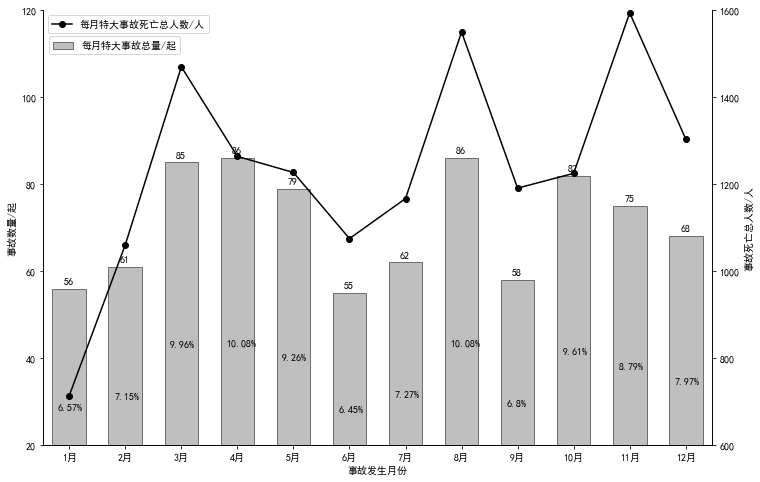

In [70]:
figure,ax = plt.subplots(figsize=(12,8))
ax.spines['top'].set_visible(False)
ax.set_ylim(20,120)
ax.set_yticks(range(20,121,20))
ax.set_xlabel('事故发生月份')
ax.set_ylabel('事故数量/起')


ax.bar(data_month.index, data_month.num,label = '每月特大事故总量/起',width=0.6,edgecolor='k',color='gray',alpha = 0.5)
ax.legend(loc = (0.01,0.9))
for i,j,k in zip(range(0,13), data_month.num.values,data_month.account.values):
    ax.text(i-0.2,j/2-0.1,k,fontsize = 10)
    ax.text(i-0.1,j+1,"%.0f" %j,fontsize = 10)

ax_1 = ax.twinx()
ax_1.spines['top'].set_visible(False)

ax_1.set_ylim(600,1600)
ax_1.set_yticks(range(600,1605,200))
ax_1.set_ylabel('事故死亡总人数/人')
ax_1.plot(data_month.index, data_month.death, color = 'k',label = '每月特大事故死亡总人数/人',marker ='o')
ax_1.legend()
plt.savefig(r'C:\Users\86177\Desktop\2005-2019年安全事故统计论文\img\3.png',dpi = 200)